In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
meanMeds = pd.read_csv('meanMedsFiltered.csv')

In [22]:
# Z-test for statiscical significance of median increase
for year in range(2019, 2024):
    meanMeds[f'z-MedIncrease{year}'] = stats.zscore(meanMeds[f'medIncrease{year}'])

    # Find p-value from z-score, multiplied by 2 for 2 tailed test
    meanMeds[f'p-MedIncrease{year}'] = stats.norm.sf(meanMeds[f'z-MedIncrease{year}'])




In [23]:
def chi2(year):
    pvalues = []
    for i, row in meanMeds.iterrows():
        # get dicts from the string they are stored as
        dict1 = ast.literal_eval(row[f'race{year-1}'])
        dict2 = ast.literal_eval(row[f'race{year}'])

        # get a set of all keys
        keys = set(dict1.keys()).union(dict2.keys())

        dict1F = {key: dict1.get(key, 0) for key in keys}
        dict2F = {key: dict2.get(key, 0) for key in keys}


        table = [[dict1F[k], dict2F[k]] for k in keys]

        stat, p, dof, expected = stats.chi2_contingency(table)
        pvalues.append(p)
    
    return pvalues

for i in range(2019,2024):
    meanMeds[f'chi{i}'] = chi2(i)

In [24]:
# A function to print the correlation coeeficients, the strength of the correlation, (r, r2, p), and graph the two variables
def regplot(x, y, title = '', xtitle = '', ytitle = ''):
    print(f'Coefficient: {x.corr(y)}')
    NAs = np.logical_or(x.isna(), y.isna())
    r, p = stats.pearsonr(x[~NAs], y[~NAs])
    print(f'R: {r} \nR2 {r**2} \nP: {p}')
    sns.regplot(x=x, y=y, line_kws={'color': 'red'})
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

In [25]:
# Descriptive statistics on the medians
print(meanMeds[[f'medIncrease{i}' for i in range(2019, 2024)]].describe())

       medIncrease2019  medIncrease2020  medIncrease2021  medIncrease2022  \
count      2933.000000      2933.000000      2933.000000      2933.000000   
mean          1.080033         1.153442         1.068355         1.075672   
std           0.087094         0.097561         0.084272         0.093195   
min           0.681818         0.708333         0.741379         0.666667   
25%           1.041667         1.098361         1.000000         1.000000   
50%           1.074074         1.137931         1.064516         1.075472   
75%           1.117647         1.193548         1.115942         1.131148   
max           1.947368         1.850000         1.941176         1.969492   

       medIncrease2023  
count      2933.000000  
mean          1.029258  
std           0.075076  
min           0.616179  
25%           1.000000  
50%           1.035088  
75%           1.067308  
max           1.457143  


In [26]:
# I wanted to see if counties were more likely to jump in price if they did the previous year. To me, this pretty clearly indicates that they don't
for year in range(2019, 2023):
    print(meanMeds[meanMeds[f'p-MedIncrease{year}'] <= 0.05][[f'medIncrease{year+1}']].describe())

       medIncrease2020
count       131.000000
mean          1.107901
std           0.139632
min           0.756098
25%           1.000000
50%           1.089552
75%           1.180325
max           1.657143
       medIncrease2021
count       179.000000
mean          0.994172
std           0.101038
min           0.741379
25%           0.933259
50%           1.000000
75%           1.060606
max           1.346667
       medIncrease2022
count       137.000000
mean          1.081744
std           0.159499
min           0.666667
25%           0.969697
50%           1.093023
75%           1.177778
max           1.969492
       medIncrease2023
count       124.000000
mean          0.976296
std           0.096675
min           0.616179
25%           0.929398
50%           1.000000
75%           1.028675
max           1.285714


Coefficient: 0.003142065960076873
R: 0.0031420659600768855 
R2 9.87257849747388e-06 
P: 0.8649367537264981


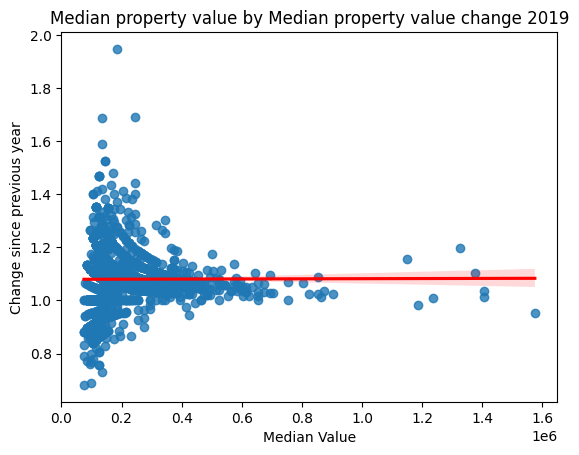

Coefficient: -0.17771753692875872
R: -0.1777175369287588 
R2 0.031583522932024745 
P: 3.078561314311418e-22


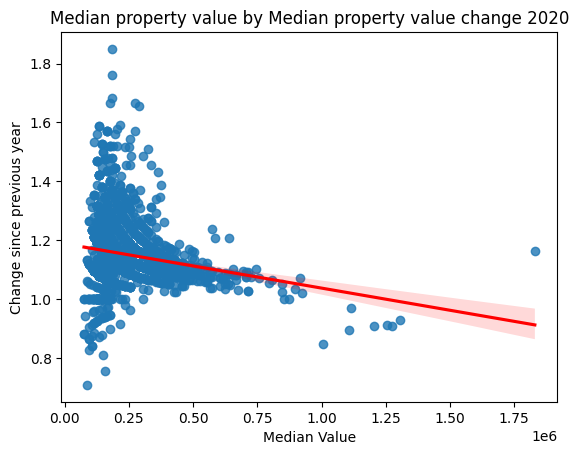

Coefficient: 0.23004038115240036
R: 0.23004038115240028 
R2 0.05291857696074159 
P: 1.5834151493594605e-36


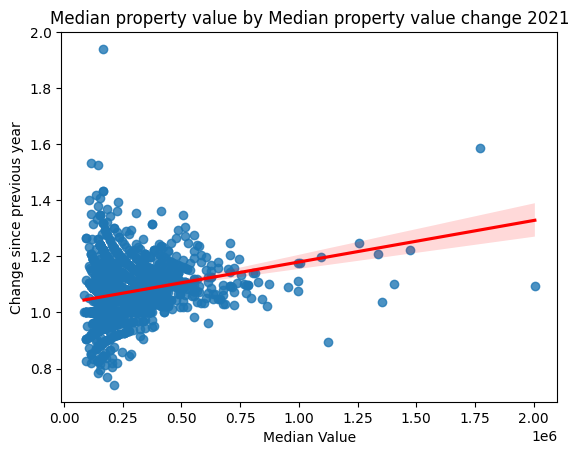

Coefficient: 0.4896928857745624
R: 0.48969288577456244 
R2 0.23979912237821865 
P: 9.517534940594494e-177


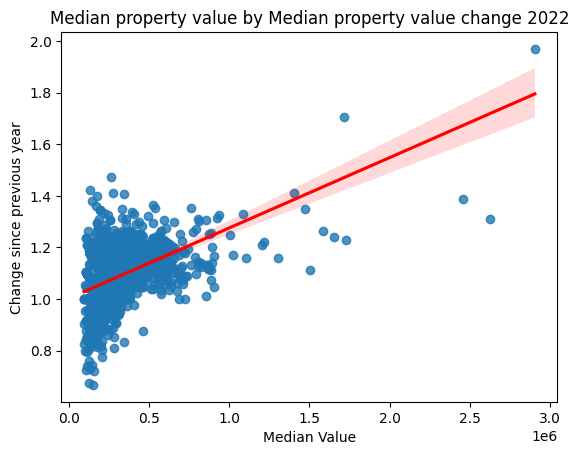

Coefficient: -0.04767184542351752
R: -0.047671845423517524 
R2 0.0022726048460837488 
P: 0.009818969202136558


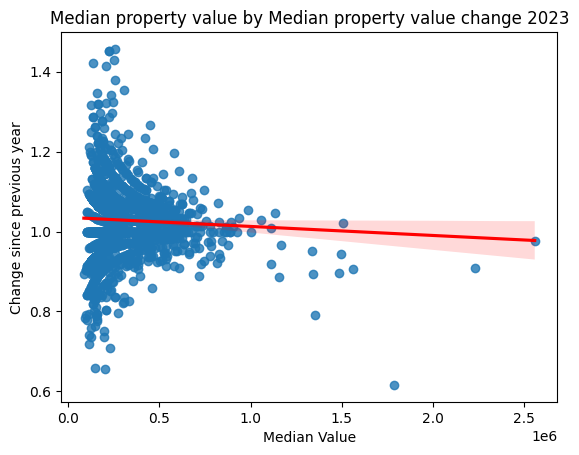

Coefficient: 0.005406349426011719
R: 0.005406349426011755 
R2 2.922861411613763e-05 
P: 0.7697744317409111


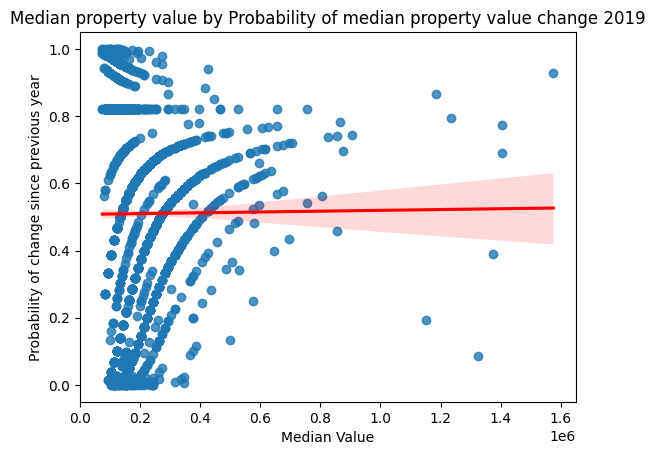

Coefficient: 0.20716664844441532
R: 0.2071666484444152 
R2 0.04291802022769192 
P: 8.50740938417182e-30


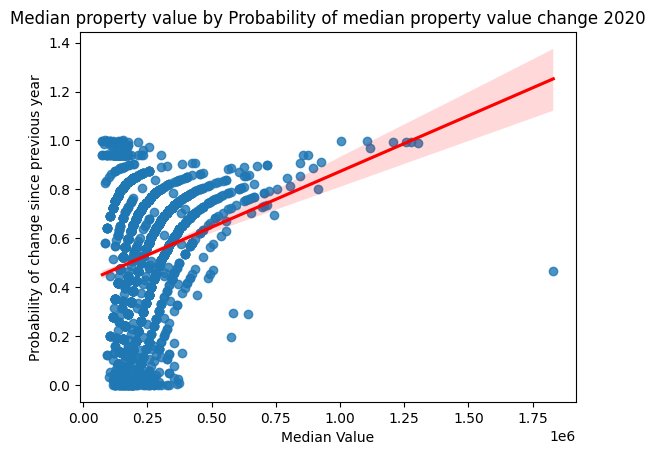

Coefficient: -0.2468525285558443
R: -0.24685252855584425 
R2 0.0609361708544139 
P: 5.7331399184926884e-42


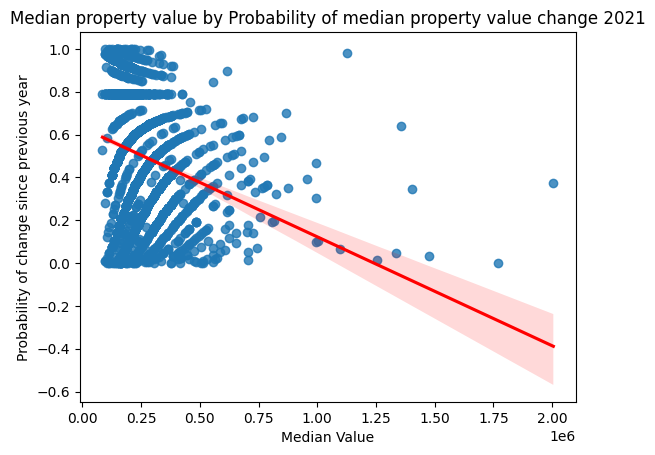

Coefficient: -0.43888974900681643
R: -0.4388897490068163 
R2 0.19262421178326622 
P: 2.2125401104400933e-138


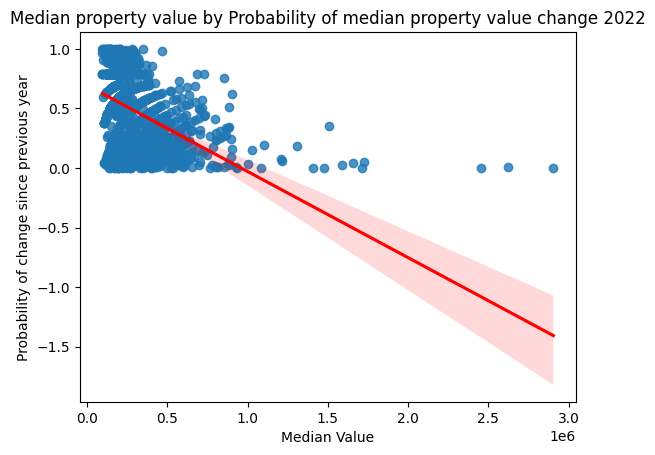

Coefficient: 0.04694638213173663
R: 0.0469463821317366 
R2 0.0022039627952590377 
P: 0.01099675793803871


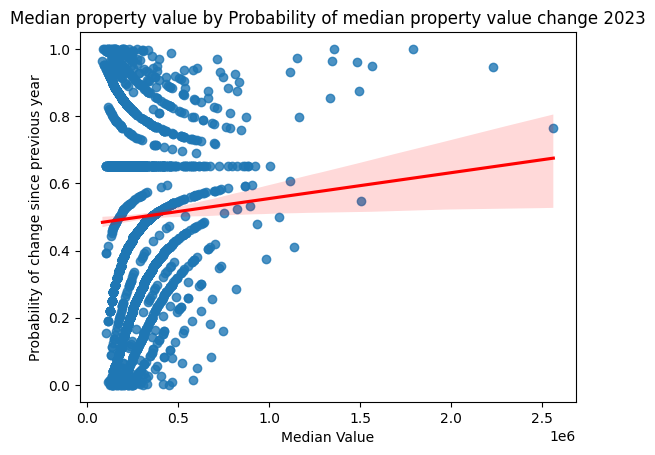

In [27]:
# Likeliehood of price jumps by value. These were some of the strongest correlations I got, but I didn't think 
# they were meaninful because I got strong both positive and negative correlations. Even with some of them being strong correlations though, 
# they did not explain much of the change
for i in range(2019, 2024):
    regplot(x=meanMeds[f'median{i}'], y=meanMeds[f'medIncrease{i}'], 
            title=f'Median property value by Median property value change {i}',
            xtitle='Median Value',
            ytitle='Change since previous year')
    
for i in range(2019, 2024):
    regplot(x=meanMeds[f'median{i}'], y=meanMeds[f'p-MedIncrease{i}'], 
            title=f'Median property value by Probability of median property value change {i}',
            xtitle='Median Value',
            ytitle='Probability of change since previous year')

Coefficient: -0.01891063550087989
R: -0.0189106355008799 
R2 0.00035761213504713915 
P: 0.3059289722571242


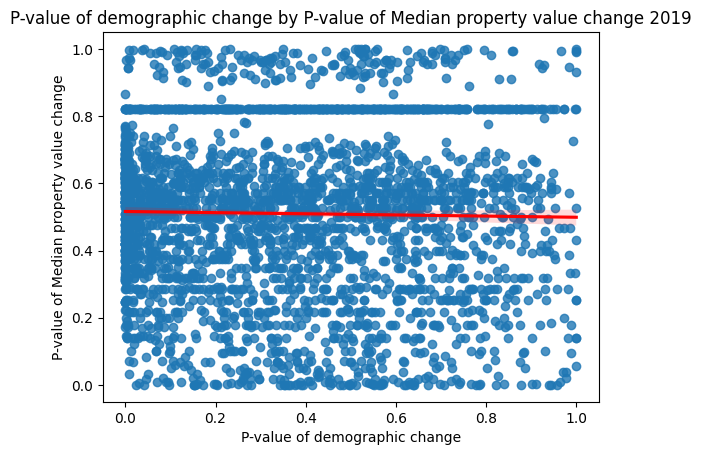

Coefficient: -0.11029046516965504
R: -0.11029046516965507 
R2 0.0121639867073389 
P: 2.114577677428722e-09


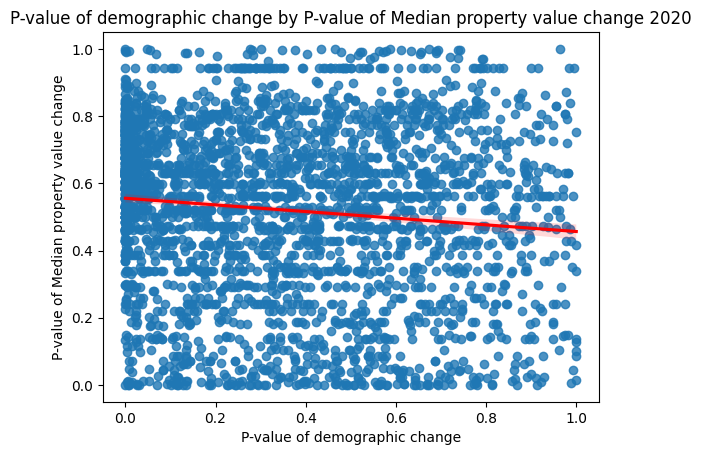

Coefficient: 0.0060904523168536905
R: 0.006090452316853692 
R2 3.7093609423868505e-05 
P: 0.7416235020240731


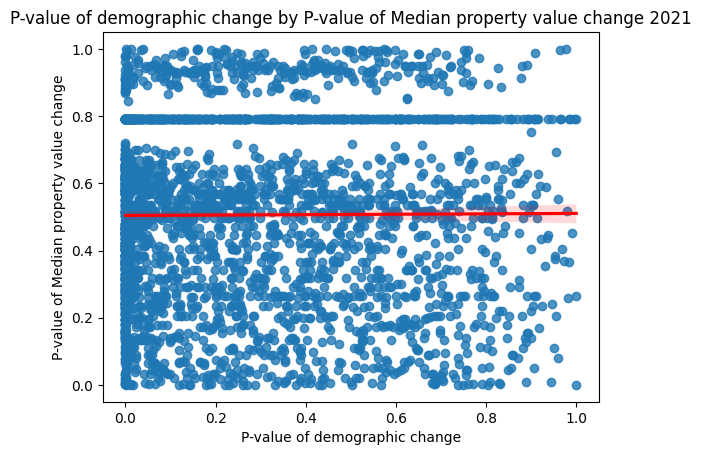

Coefficient: 0.09808426130838761
R: 0.0980842613083876 
R2 0.009620522316412061 
P: 1.0232803951833069e-07


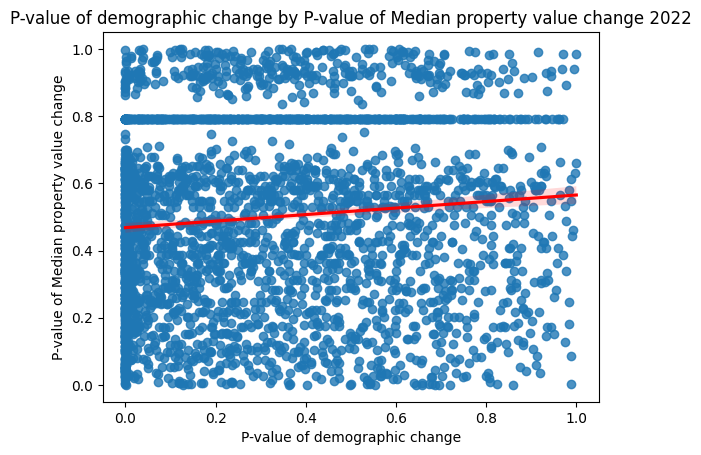

Coefficient: -0.003949940881305307
R: -0.0039499408813053315 
R2 1.5602032965807138e-05 
P: 0.8306817336163934


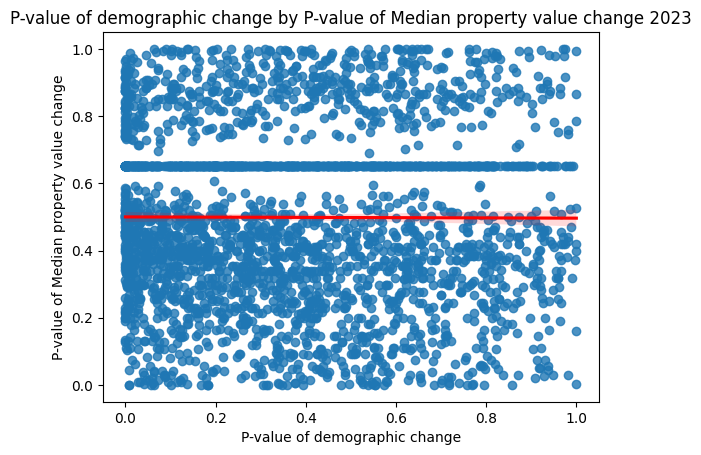

In [28]:
for i in range(2019, 2024):
    regplot(x=meanMeds[f'chi{i}'], y=meanMeds[f'p-MedIncrease{i}'], 
            title=f'P-value of demographic change by P-value of Median property value change {i}',
            xtitle='P-value of demographic change',
            ytitle='P-value of Median property value change')

Coefficient: 0.026977215389096806
R: 0.026977215389096816 
R2 0.0007277701501497221 
P: 0.14411071816203586


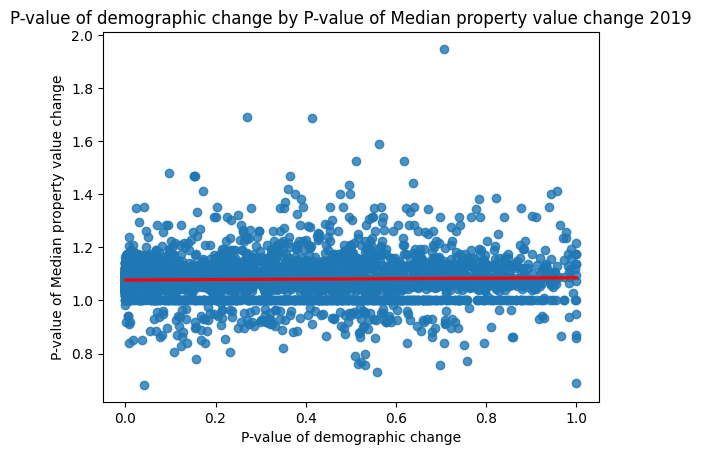

Coefficient: 0.08888643573868729
R: 0.08888643573868733 
R2 0.007900798458327793 
P: 1.4260279345647275e-06


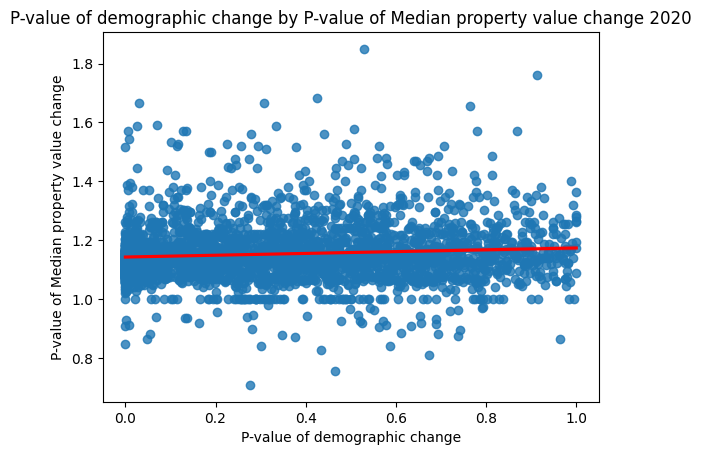

Coefficient: -0.003187251599453407
R: -0.0031872515994534004 
R2 1.015857275821826e-05 
P: 0.8630134786752347


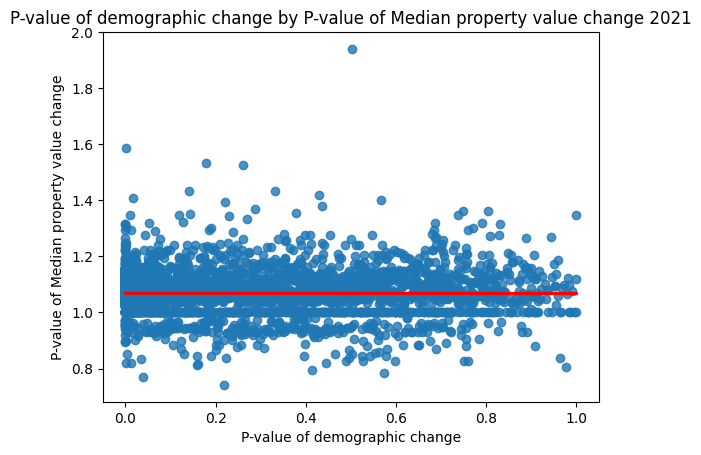

Coefficient: -0.0792737841277223
R: -0.07927378412772232 
R2 0.006284332849928719 
P: 1.7220642865125585e-05


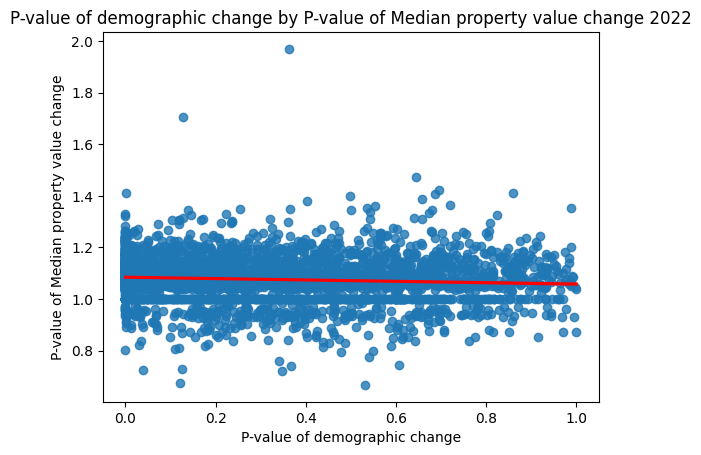

Coefficient: -0.0054210229700444425
R: -0.005421022970044452 
R2 2.938749004174957e-05 
P: 0.7691672690663248


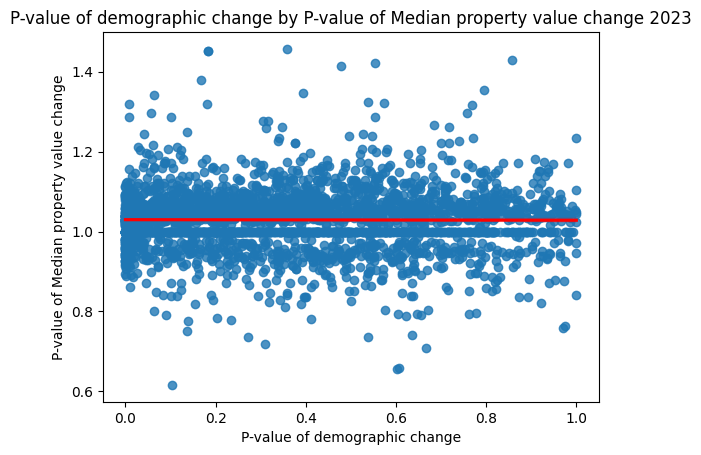

In [29]:
# confidence of demographic change by median change. This just looked like noise to me which is confirmed by the statistics

for i in range(2019, 2024):
    regplot(x=meanMeds[f'chi{i}'], y=meanMeds[f'medIncrease{i}'], 
            title=f'P-value of demographic change by Median property value change {i}',
            xtitle='P-value of demographic change',
            ytitle='Median property value change')
    


In [ ]:
## Comparing to external datasets

In [30]:
czconnect = pd.read_csv(r'..\loadData\data\external\Citizen_Connect_-_County_data__live__20241210.csv')
# Filter for only commuting and demographic data
commuters = czconnect[czconnect['Category'] == 'Commuting']
demographics = czconnect[czconnect['Category'] == 'Demographics']
del czconnect

resPermits = pd.read_csv(r'..\loadData\data\external\Residential_Construction_Permits_by_County_5026727375813176131.csv')

# years are separated by columns, so filter for only applicable years
dataRange = ['GEOID']
for year in range(2018, 2023):
    dataRange.append(f'ALL_PERMITS_{year}')
    dataRange.append(f'SINGLE_FAMILY_PERMITS_{year}')
    dataRange.append(f'ALL_MULTIFAMILY_PERMITS_{year}')
    dataRange.append(f'MULTIFAMILY_PERMITS_2_UNITS_{year}')
    dataRange.append(f'MULTIFAMILY_PERMITS_3_4_UNITS_{year}')
    dataRange.append(f'MULTIFAMILY_PERMITS_5_OR_MORE_UNITS_{year}')
# These two are labeled slightly differently, no idea why
dataRange[-2], dataRange[-1] = ['MULTIFAMILY_PERMITS_3_4_UNIT_2022', 'MULTIFAMILY_PERMITS_5_OR_MORE_2022']
resPermits = resPermits[dataRange]
resPermits.index = resPermits['GEOID']


Coefficient: 0.1330017124727524
R: 0.1330017124727524 
R2 0.017689455520684697 
P: 0.24570679844437066


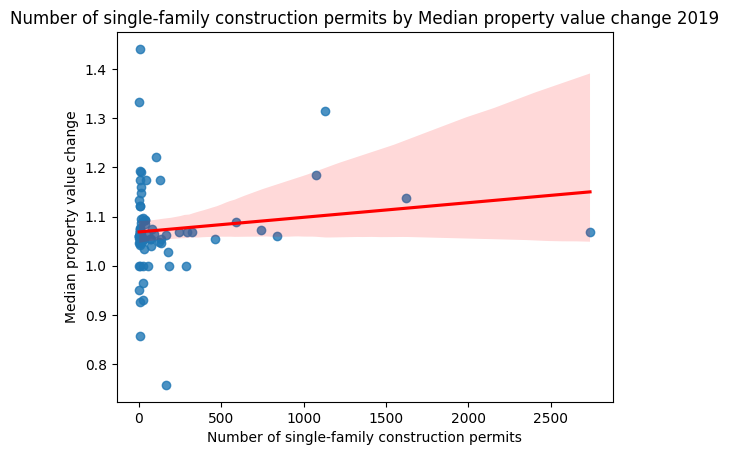

Coefficient: -0.02127269516490521
R: -0.021272695164905223 
R2 0.00045252755957898204 
P: 0.8514290395109074


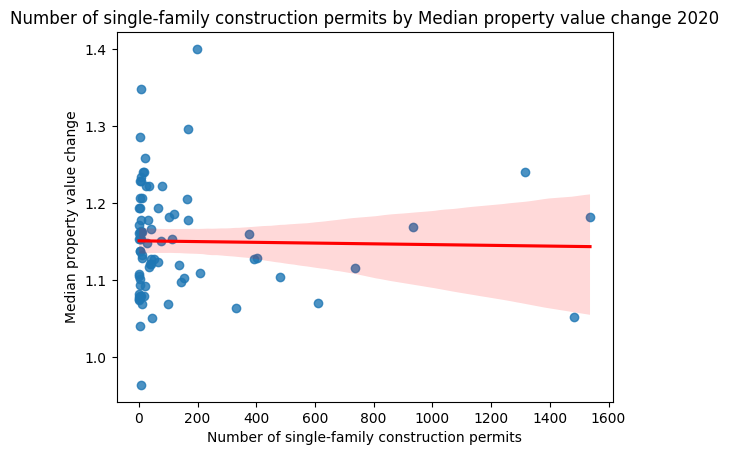

Coefficient: -0.11476654253051861
R: -0.11476654253051857 
R2 0.013171359284409328 
P: 0.27069690045139705


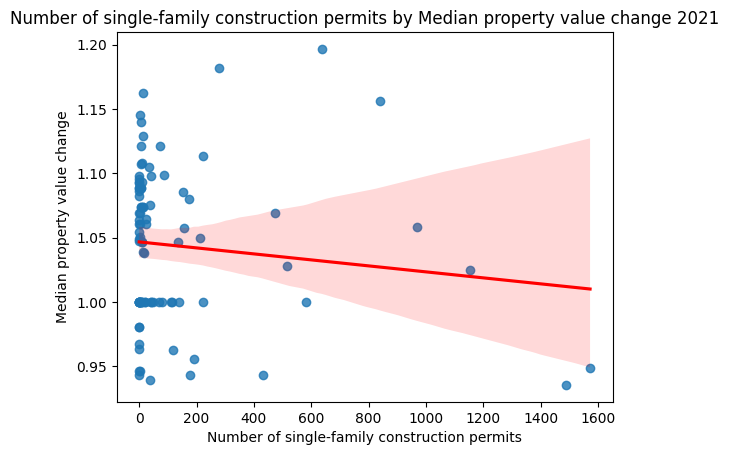

Coefficient: 0.1581193569641162
R: 0.15811935696411614 
R2 0.025001731046745582 
P: 0.17845771324715387


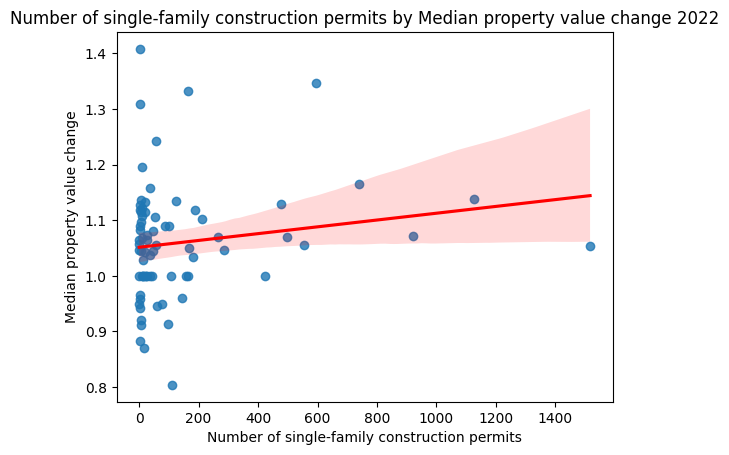

In [31]:
# The large majority of counties had less than 200 permits, but some few outliers had over 1000 which may have overly contributed to 
# shaping the regression. These are often counties that experienced natural disasters, and those outliers may be able to be filtered out via the FEMA dataset.
for i in range(2019, 2023):
    temp = resPermits.copy()
    temp[f'medincrease{i}'] = meanMeds[f'medIncrease{i}']
    temp = temp[temp[f'SINGLE_FAMILY_PERMITS_{i}'] <= 3000]
    
    regplot(x=temp[f'SINGLE_FAMILY_PERMITS_{i}'], y=temp[f'medincrease{i}'], 
            title=f'Number of single-family construction permits by Median property value change {i}',
            xtitle='Number of single-family construction permits',
            ytitle='Median property value change')




# FEMA, remove disaster areas (disaster decleration)

In [32]:
commuters = commuters[(commuters['Year'] == 2018) | (commuters['Year'] == 2019)]
df = commuters.pivot_table(index='GEOID', columns=['Year', 'Variable'], values='Value')

def chi2com(year):
    pvalues = []
    for i, row in df.iterrows():

        table = [[row[(2018, 'Commute by car/ truck/van')],
                row[(2018, 'Commute by public transportation')],
                row[(2018, 'Work at home')]], 
                [row[(2019, 'Commute by car/ truck/van')],
                row[(2019, 'Commute by public transportation')],
                row[(2019, 'Work at home')]]]

        try:
            stat, p, dof, expected = stats.chi2_contingency(table)
            pvalues.append(p)
        except ValueError:
            pvalues.append(1.0)
            continue
    
    return pvalues

df['workerchange'] = chi2com(2019)

# quantify commuter change

Coefficient: 0.07386965356561441
R: 0.07386965356561441 
R2 0.00545672571790389 
P: 0.5016603708954921


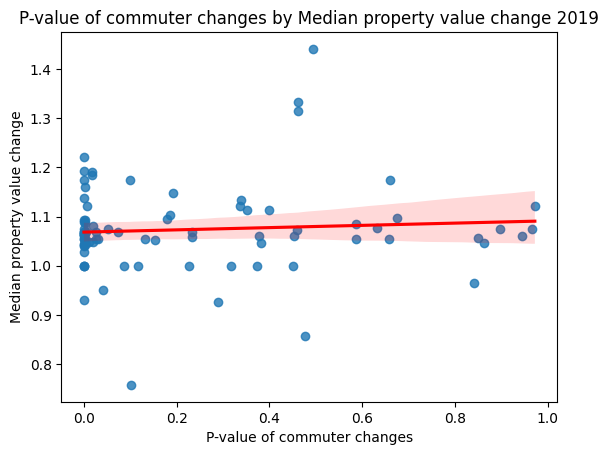

Coefficient: -0.040319390775796535
R: -0.040319390775796514 
R2 0.001625653272531385 
P: 0.7140878569590908


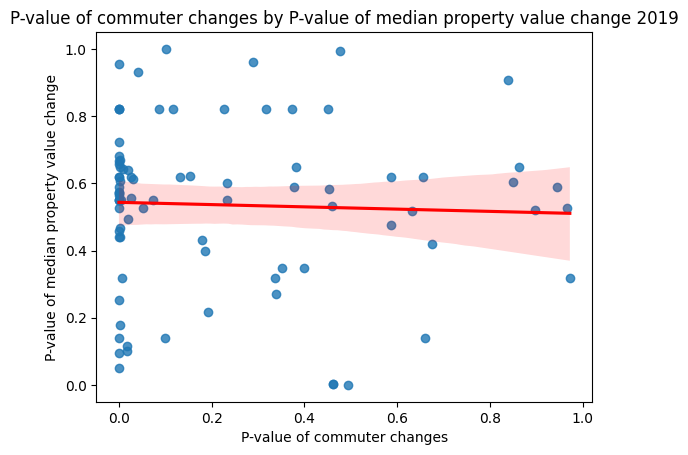

In [33]:
# Likelihood of change in commuters by the median increase and the confidence of an abnormal increase. 
# I only have the year 2019 but more data may be published soon. 
# Note I filtered out where the worker change is 1 because that often indicated a lack of some variables to 
# compare (see my above function for deriving it).
df = df[df['workerchange'] != 1.0]
df['medincrease2019'] = meanMeds['medIncrease2019']
df['p-MedIncrease2019'] = meanMeds['p-MedIncrease2019']



regplot(x=df['workerchange'], y=df[f'medincrease2019'], 
        title=f'P-value of commuter changes by Median property value change 2019',
        xtitle='P-value of commuter changes',
        ytitle='Median property value change')

regplot(x=df['workerchange'], y=df[f'p-MedIncrease2019'], 
        title=f'P-value of commuter changes by P-value of median property value change 2019',
        xtitle='P-value of commuter changes',
        ytitle='P-value of median property value change')

Coefficient: 0.11842317033770107
R: 0.11842317033770106 
R2 0.01402404727283216 
P: 0.28038907879487623


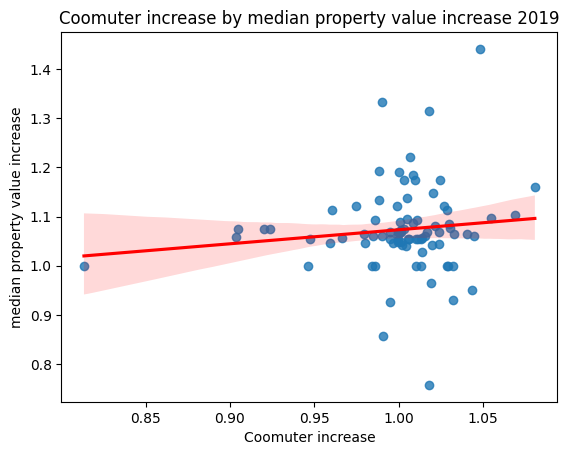

In [34]:
# This is one of my strongest correlations and it looks like there may be something to it, but it's impossible to know for sure without more data.
df['commDif'] = df[(2019, 'Commute by car/ truck/van')]/df[(2018, 'Commute by car/ truck/van')]

regplot(x=df['commDif'], y=df[f'medincrease2019'], 
        title=f'Coomuter increase by median property value increase 2019',
        xtitle='Coomuter increase',
        ytitle='median property value increase')

# Unuasable data
Some of the demographics from the citizens connect county data seem to be broken. The values in many rows are all equal despite the fact that one of the rows is supposed to be a the total and others subsets. Additionally, median household income is under the category 'demographics'. Due to this, I will only be using the median household income data from this section.

In [35]:
demographics = demographics[(demographics['Year'] == 2018) | (demographics['Year'] == 2019)]
demo = demographics.pivot_table(index='GEOID', columns=['Year', 'Variable'], values=['Value', 'Denominator'])

# pivot and get median household income from dataset
income = demographics.pivot_table(index='GEOID', columns=['Year', 'Variable'], values='Value')[[(2018, 'Median Household Income'), 
(2019, 'Median Household Income')]]